In [2]:
%%capture

#NOTA: Capture sirve para esconder el resultado de una celda
#importo librerias necesarias
#!pip install ipython-sql;
# Install the 'ipython-sql' and 'prettytable' libraries using pip
#!pip install ipython-sql prettytable;
#pandas
#!pip install pandas

#importo sqlaclhemy
from sqlalchemy import create_engine
# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable
#pandas
import pandas as pd

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'
#cargo la extension de la libreria sql alchemy, para poder hacer magic commands
%load_ext sql

In [3]:
import sqlite3

data = pd.read_csv('data/menu.csv')
print(data)
con = sqlite3.connect("McDonalds.db")
cur = con.cursor()
data.to_sql('mcdonalds_nutrition', con)

               Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calories  Calories from Fat  Total Fat  \

ValueError: Table 'mcdonalds_nutrition' already exists.

In [23]:
res = cur.execute("SELECT DISTINCT(Category) FROM mcdonalds_nutrition")
res.fetchall()

[('Breakfast',),
 ('Beef & Pork',),
 ('Chicken & Fish',),
 ('Salads',),
 ('Snacks & Sides',),
 ('Desserts',),
 ('Beverages',),
 ('Coffee & Tea',),
 ('Smoothies & Shakes',)]

Otra forma de consultar al database es usar el magic command

In [27]:
%sql sqlite:///McDonalds.db

In [29]:
%%sql

SELECT * FROM mcdonalds_nutrition WHERE Category = 'Breakfast' LIMIT 10

 * sqlite:///McDonalds.db
   sqlite:///SQLiteMagic.db
Done.


index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,300,100,960,40,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15


Ahora, podemos volver a pandas y crear un dataframe a partir del database. Este deberia ser igual a la variable data, que fue el dataframe que cargamos desde el csv y que usamos para crear el database

In [34]:
df = pd.read_sql("SELECT * FROM mcdonalds_nutrition", con)
print(df.head())
print(data.head())

   index   Category                              Item    Serving Size  \
0      0  Breakfast                      Egg McMuffin  4.8 oz (136 g)   
1      1  Breakfast                 Egg White Delight  4.8 oz (135 g)   
2      2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)   
3      3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)   
4      4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)   

   Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0       300                120       13.0                         20   
1       250                 70        8.0                         12   
2       370                200       23.0                         35   
3       450                250       28.0                         43   
4       400                210       23.0                         35   

   Saturated Fat  Saturated Fat (% Daily Value)  ...  Carbohydrates  \
0            5.0                             25  ...     

In [35]:
df.describe(include = 'all')

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,NaN,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coffee & Tea,McFlurry with Reese's Peanut Butter Cups (Snack),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.500000,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


Explorando la data

In [36]:
!pip install matplotlib
!pip install seaborn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

  Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 5.4 MB/s eta 0:00:005.5 MB/s eta 0:00:01
Using cached contourpy-1.3.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.2 MB/s eta 0:00:007.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:007.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 7.8 MB/s eta 0:00:007.2 MB/s eta 0:00:01


/home/rafael/Documents/Cursos/Coursera/SQL_Pyhton_IBM_Coursera/Module_4_pythonAndSQL/.env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafael/Documents/Cursos/Coursera/SQL_Pyhton_IBM_Coursera/Module_4_pythonAndSQL/.env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafael/Documents/Cursos/Coursera/SQL_Pyhton_IBM_Coursera/Module_4_pythonAndSQL/.env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafael/Documents/Cursos/Coursera/SQL_Pyhton_IBM_Coursera/Module_4_pythonAndSQL/.env/lib/python

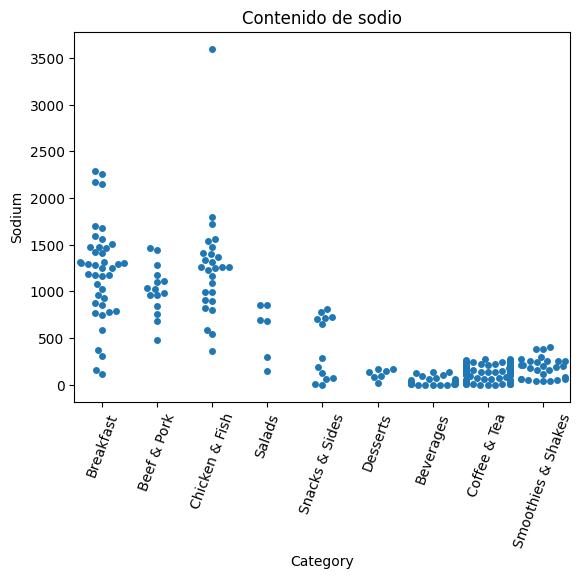

In [39]:
plot = sns.swarmplot(x="Category", y="Sodium", data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title("Contenido de sodio")
plt.show()

In [40]:
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [41]:
#Para obtener el indice en donde ocurre el maximo de sodio
df['Sodium'].idxmax()

82

In [43]:
#Para obtener la info de este elemento
df.iloc[82]

index                                                      82
Category                                       Chicken & Fish
Item                             Chicken McNuggets (40 piece)
Serving Size                                  22.8 oz (646 g)
Calories                                                 1880
Calories from Fat                                        1060
Total Fat                                               118.0
Total Fat (% Daily Value)                                 182
Saturated Fat                                            20.0
Saturated Fat (% Daily Value)                             101
Trans Fat                                                 1.0
Cholesterol                                               265
Cholesterol (% Daily Value)                                89
Sodium                                                   3600
Sodium (% Daily Value)                                    150
Carbohydrates                                             118
Carbohyd

In [44]:
#tambien podria hacer
df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

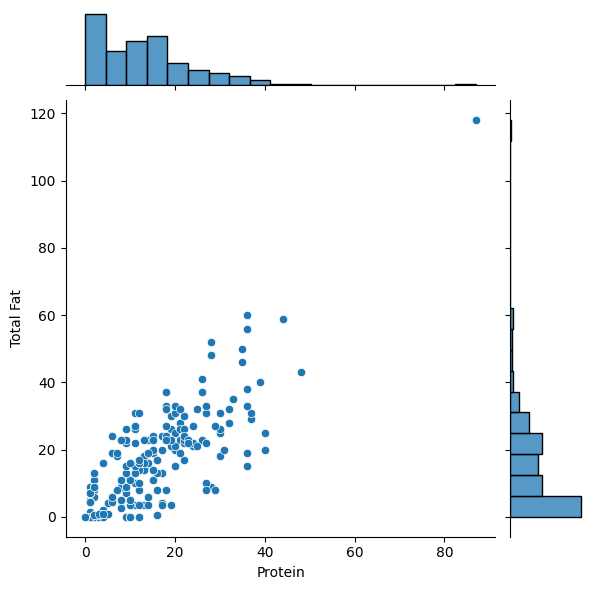

In [46]:
plot = sns.jointplot(x="Protein", y="Total Fat", data=df)
plt.show()

Hay una clara correlacion entre la proteina y la grasa que tienen los alimentos

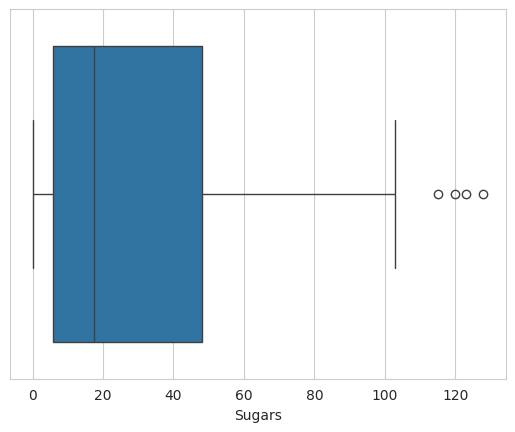

In [47]:
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["Sugars"])
plt.show()